In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

df=pd.read_csv("knn.csv")
df.rename(columns={"brightness":"b","saturation":"s"},inplace=True)
df['d']=0.0

In [14]:
df

,b,s,class,d
0,40,20,R,0.0
1,50,50,B,0.0
2,60,90,B,0.0
3,10,25,R,0.0
4,70,70,B,0.0
5,60,10,R,0.0
6,25,80,B,0.0


In [ ]:
def knn_find(df,new,k):
    for i in range(len(df)):
        t=((new[0]-df["b"][i])**2 + (new[1]-df['s'][i])**2 )**(0.5)
        df.loc[i, 'd']=t
    df.sort_values(by="d")
    r=[]
    for i in range(k):
        r.append(df["class"][i])
    print(r)
    return max(set(r), key = r.count)

In [28]:
knn_find(df,[20,35],5)

['R', 'B', 'B', 'R', 'B']


'B'

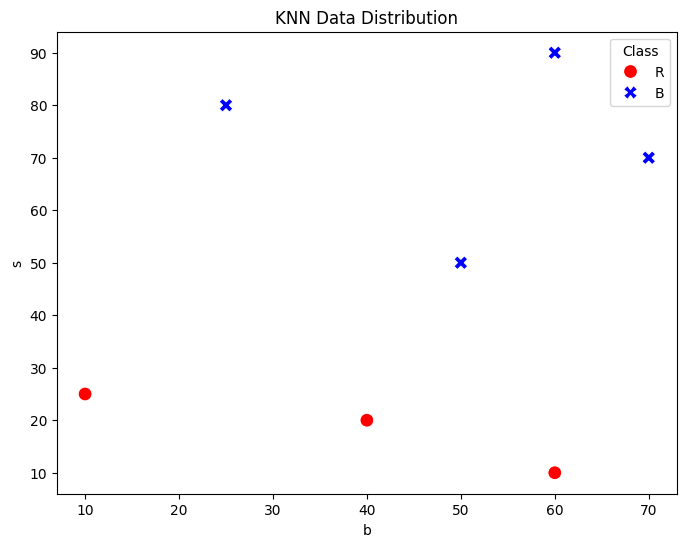

In [ ]:
import seaborn as sns
# Load data (update 'data.csv' with your actual filename)

# Scatter plot with class-based coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='b', y='s', hue='class', style='class', palette={'R': 'red', 'B': 'blue'}, s=100)

# Labels and title
plt.xlabel('b')
plt.ylabel('s')
plt.title('KNN Data Distribution')
plt.legend(title="Class")

# Show plot
plt.show()

The point (20, 35) is classified as R


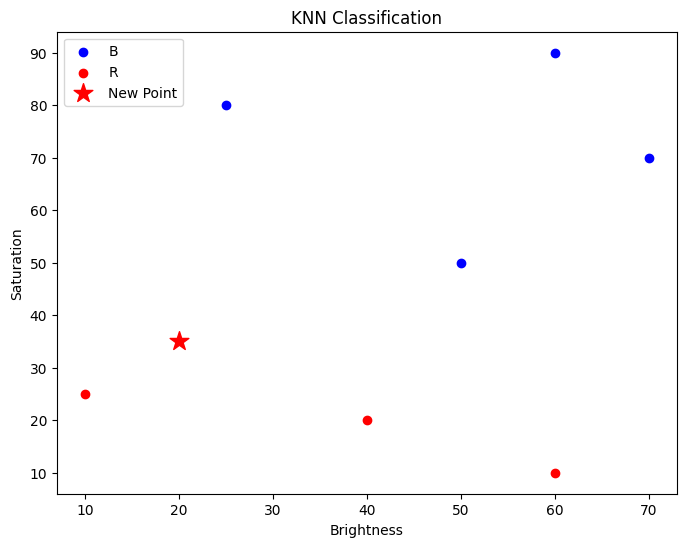

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('knn.csv')
X = df[['brightness', 'saturation']].values
y = df['class'].values

# Train KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Function to predict new value
def predict_new(brightness, saturation):
    new_point = np.array([[brightness, saturation]])
    predicted_class = knn.predict(new_point)[0]
    return predicted_class

# Example prediction
new_brightness, new_saturation = 20, 35
predicted_class = predict_new(new_brightness, new_saturation)
print(f"The point ({new_brightness}, {new_saturation}) is classified as {predicted_class}")

# Plot results
plt.figure(figsize=(8, 6))
colors = {'R': 'red', 'B': 'blue'}
for class_label in np.unique(y):
    subset = df[df['class'] == class_label]
    plt.scatter(subset['brightness'], subset['saturation'], color=colors[class_label], label=class_label)

plt.scatter(new_brightness, new_saturation, color=colors[predicted_class], marker='*', s=200, label='New Point')
plt.xlabel('Brightness')
plt.ylabel('Saturation')
plt.title('KNN Classification')
plt.legend()
plt.show()